In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!unzip /content/drive/MyDrive/data/CIFAR-10-images-master.zip

Streaming output truncated to the last 5000 lines.
  inflating: CIFAR-10-images-master/train/truck/0000.jpg  
  inflating: CIFAR-10-images-master/train/truck/0001.jpg  
  inflating: CIFAR-10-images-master/train/truck/0002.jpg  
  inflating: CIFAR-10-images-master/train/truck/0003.jpg  
  inflating: CIFAR-10-images-master/train/truck/0004.jpg  
  inflating: CIFAR-10-images-master/train/truck/0005.jpg  
  inflating: CIFAR-10-images-master/train/truck/0006.jpg  
  inflating: CIFAR-10-images-master/train/truck/0007.jpg  
  inflating: CIFAR-10-images-master/train/truck/0008.jpg  
  inflating: CIFAR-10-images-master/train/truck/0009.jpg  
  inflating: CIFAR-10-images-master/train/truck/0010.jpg  
  inflating: CIFAR-10-images-master/train/truck/0011.jpg  
  inflating: CIFAR-10-images-master/train/truck/0012.jpg  
  inflating: CIFAR-10-images-master/train/truck/0013.jpg  
  inflating: CIFAR-10-images-master/train/truck/0014.jpg  
  inflating: CIFAR-10-images-master/train/truck/0015.jpg  
  inf

In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [11]:
train_Data = '/content/CIFAR-10-images-master/train'
test_Data = '/content/CIFAR-10-images-master/test'
CATEGORIES = []
for c in os.listdir(train_Data):
    CATEGORIES.append(c)
print(CATEGORIES)

['cat', 'airplane', 'truck', 'dog', 'bird', 'automobile', 'deer', 'frog', 'ship', 'horse']


In [12]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(train_Data,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({
            'image': img_arr,
            'class': class_num
        })
print(len(TRAIN_DATA))


100%|██████████| 5000/5000 [00:00<00:00, 16529.13it/s]

50000


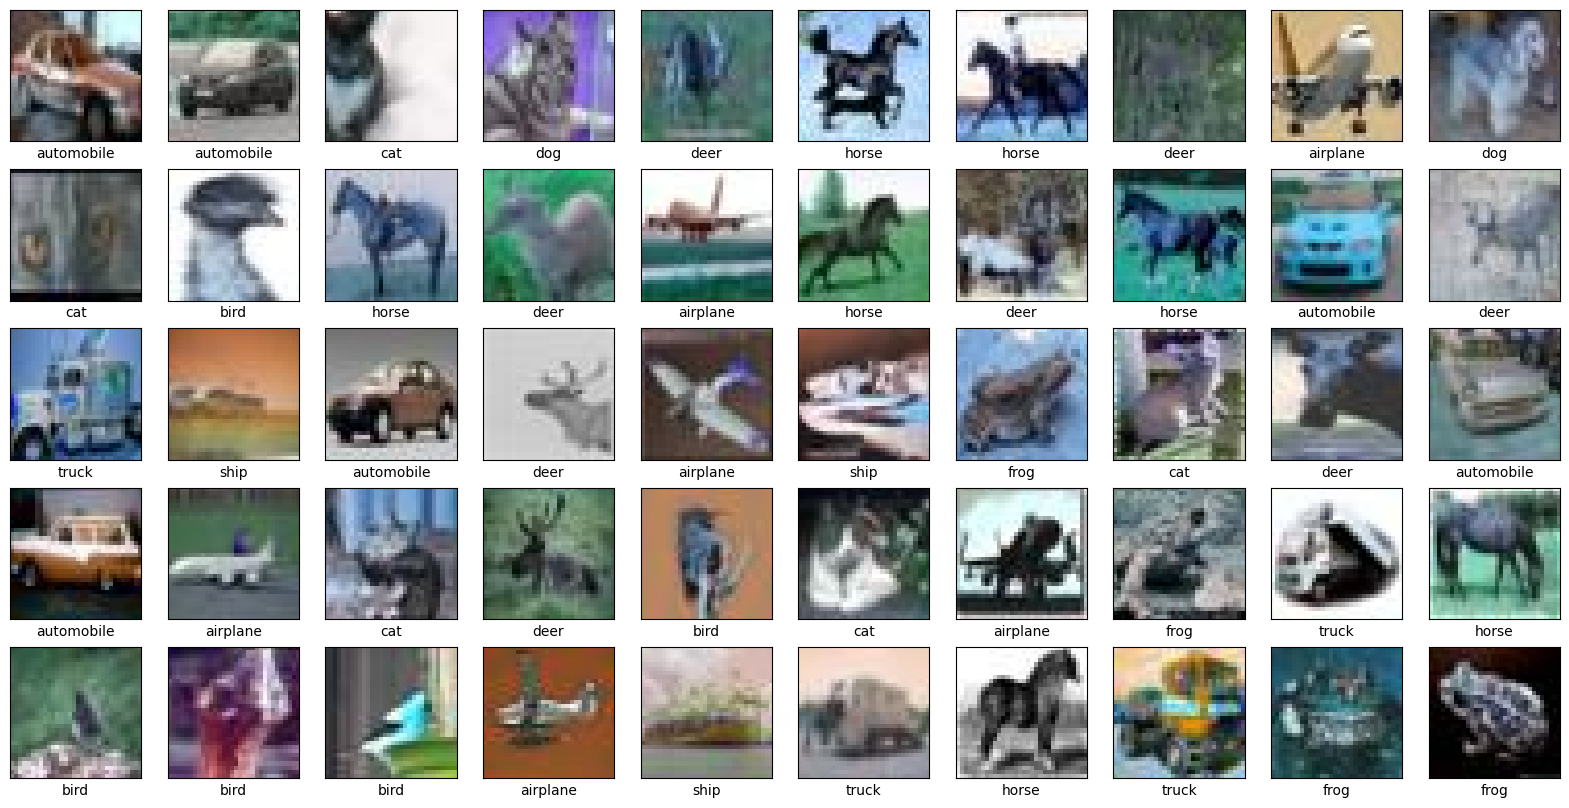

In [13]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [14]:
f0 = train_Data[0:1000]
f1 = train_Data[1000:2000]
f2 = train_Data[2000:3000]
f3 = train_Data[3000:4000]
f4 = train_Data[4000:5000]

def train_test_split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test




In [15]:
class KNeighborClassifer:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)

    def predict(self, X_test, l_func = "l2"):
        y_predtion = []
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion


In [16]:

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_accuracies = {}
l2_accuracies = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNeighborClassifer(k)

    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")


    l1_accuracies[k] = knn.accuracy(y_test, y_pred_l1)
    l2_accuracies[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")






100%|██████████| 1000/1000 [01:08<00:00, 14.56it/s]

  5%|▌         | 1/19 [02:36<46:49, 156.06s/it]

for k = 1 l1 accuracy is 0.199 and l2 accuracy is 0.202



100%|██████████| 1000/1000 [01:08<00:00, 14.58it/s]

 11%|█         | 2/19 [05:15<44:42, 157.79s/it]

for k = 2 l1 accuracy is 0.206 and l2 accuracy is 0.18



100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]

 16%|█▌        | 3/19 [07:55<42:21, 158.82s/it]

for k = 3 l1 accuracy is 0.197 and l2 accuracy is 0.171



100%|██████████| 1000/1000 [01:10<00:00, 14.18it/s]

 21%|██        | 4/19 [10:38<40:10, 160.71s/it]

for k = 4 l1 accuracy is 0.211 and l2 accuracy is 0.19



100%|██████████| 1000/1000 [01:12<00:00, 13.79it/s]

 26%|██▋       | 5/19 [13:26<38:03, 163.12s/it]

for k = 5 l1 accuracy is 0.2 and l2 accuracy is 0.195



100%|██████████| 1000/1000 [01:11<00:00, 13.91it/s]

 32%|███▏      | 6/19 [16:15<35:46, 165.09s/it]

for k = 6 l1 accuracy is 0.203 and l2 accuracy is 0.199



100%|██████████| 1000/1000 [01:15<00:00, 13.28it/s]

 37%|███▋      | 7/19 [19:05<33:24, 167.00s/it]

for k = 7 l1 accuracy is 0.217 and l2 accuracy is 0.203



100%|██████████| 1000/1000 [01:16<00:00, 13.06it/s]

 42%|████▏     | 8/19 [22:01<31:05, 169.59s/it]

for k = 8 l1 accuracy is 0.216 and l2 accuracy is 0.204



100%|██████████| 1000/1000 [01:15<00:00, 13.20it/s]

 47%|████▋     | 9/19 [24:57<28:37, 171.72s/it]

for k = 9 l1 accuracy is 0.223 and l2 accuracy is 0.203



100%|██████████| 1000/1000 [01:18<00:00, 12.72it/s]

 53%|█████▎    | 10/19 [27:58<26:10, 174.52s/it]

for k = 10 l1 accuracy is 0.221 and l2 accuracy is 0.202



100%|██████████| 1000/1000 [01:19<00:00, 12.59it/s]

 58%|█████▊    | 11/19 [31:04<23:44, 178.04s/it]

for k = 11 l1 accuracy is 0.22 and l2 accuracy is 0.21



100%|██████████| 1000/1000 [01:20<00:00, 12.39it/s]

 63%|██████▎   | 12/19 [34:13<21:09, 181.30s/it]

for k = 12 l1 accuracy is 0.22 and l2 accuracy is 0.216



100%|██████████| 1000/1000 [01:22<00:00, 12.09it/s]

 68%|██████▊   | 13/19 [37:27<18:31, 185.33s/it]

for k = 13 l1 accuracy is 0.228 and l2 accuracy is 0.207



100%|██████████| 1000/1000 [01:27<00:00, 11.42it/s]

 74%|███████▎  | 14/19 [40:52<15:56, 191.24s/it]

for k = 14 l1 accuracy is 0.217 and l2 accuracy is 0.208



100%|██████████| 1000/1000 [01:33<00:00, 10.73it/s]

 79%|███████▉  | 15/19 [44:25<13:11, 197.86s/it]

for k = 15 l1 accuracy is 0.217 and l2 accuracy is 0.203



100%|██████████| 1000/1000 [01:32<00:00, 10.78it/s]

 84%|████████▍ | 16/19 [47:57<10:06, 202.18s/it]

for k = 16 l1 accuracy is 0.22 and l2 accuracy is 0.213



100%|██████████| 1000/1000 [01:36<00:00, 10.32it/s]

 89%|████████▉ | 17/19 [51:32<06:51, 205.84s/it]

for k = 17 l1 accuracy is 0.224 and l2 accuracy is 0.216



100%|██████████| 1000/1000 [01:37<00:00, 10.25it/s]

 95%|█████████▍| 18/19 [55:13<03:30, 210.53s/it]

for k = 18 l1 accuracy is 0.226 and l2 accuracy is 0.209



100%|██████████| 1000/1000 [01:38<00:00, 10.10it/s]

100%|██████████| 19/19 [58:51<00:00, 185.89s/it]

for k = 19 l1 accuracy is 0.231 and l2 accuracy is 0.206


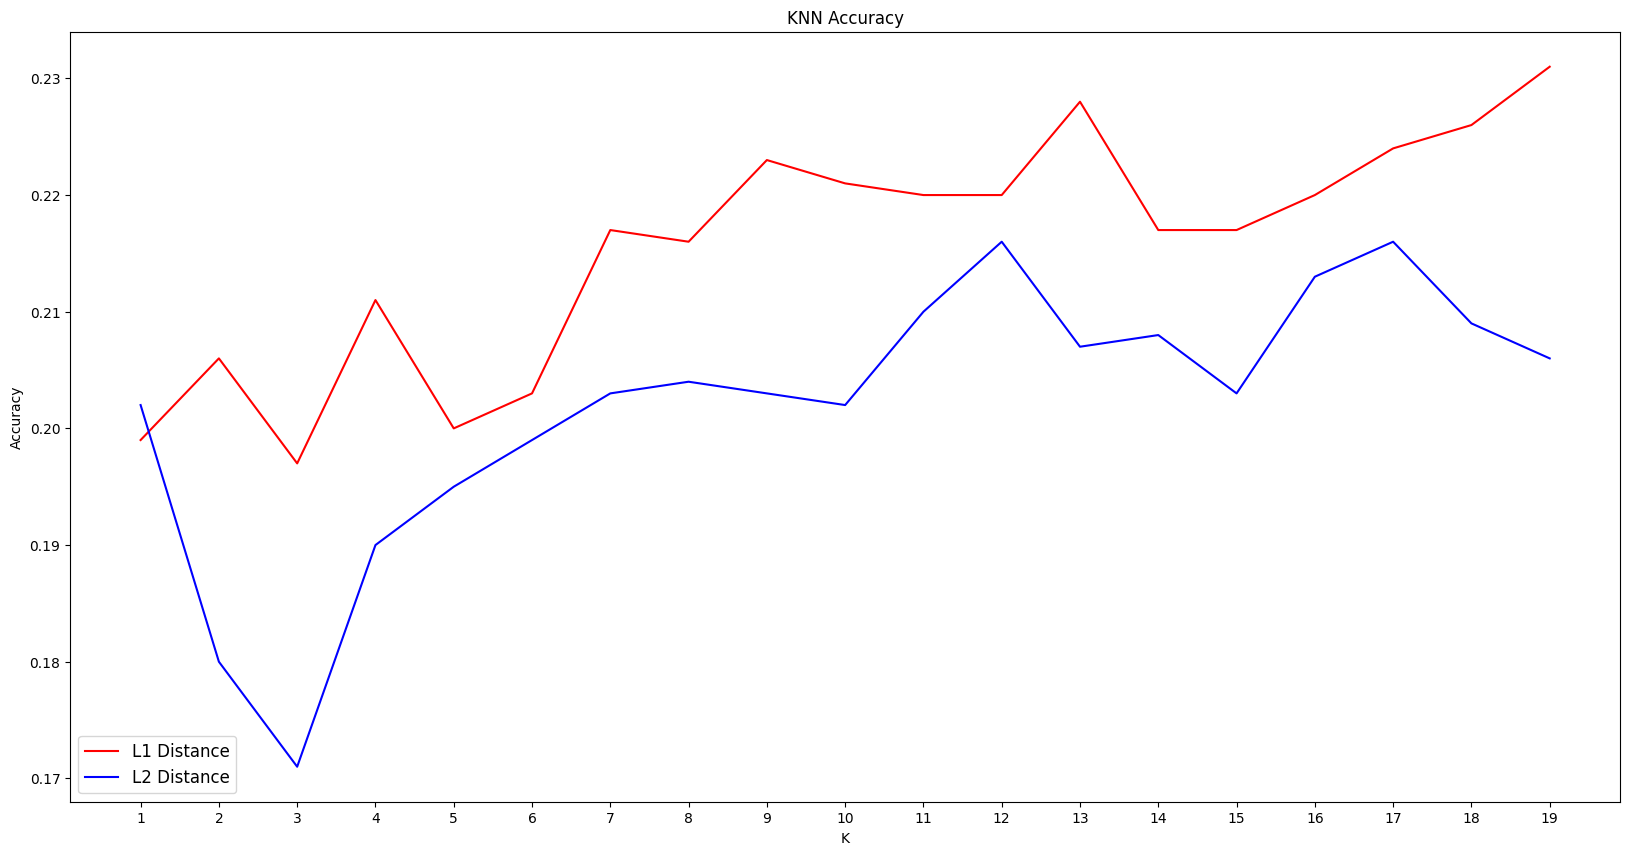

In [17]:
plt.figure(figsize=(20,10))
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_accuracies.values()), label="L1 Distance", color="red")
plt.plot(k_neighbors, list(l2_accuracies.values()), label="L2 Distance", color="blue")
plt.xticks(k_neighbors)
plt.legend([
    "L1 Distance",
    "L2 Distance"
], loc="lower left", fontsize=12)
plt.show()

In [19]:
def best_accuracy(accuracies):
    best_k = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_k]
    return best_k, best_accuracy

best_k_l1, best_accuracy_l1 = best_accuracy(l1_accuracies)
best_k_l2, best_accuracy_l2 = best_accuracy(l2_accuracies)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {best_accuracy_l1}")

Best K for L1 Distance is 19 with accuracy 0.231


# **Best K for L1 Distance is 19 with accuracy 0.231**